# Credit Default Project

In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [170]:
df = pd.read_excel(r"default_of_credit_card_clients.xls", header=1)

In [171]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [173]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [174]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)

## ID

This is effectively an index, and we drop it from the dataframe.

In [175]:
df=df.drop(columns=['ID'])

## Limit Balance

This is the amount of given credit, in Taiwan dollars (NT). 

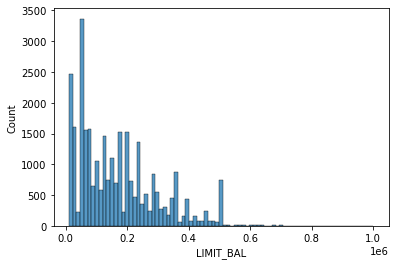

In [176]:
%matplotlib inline
sns.histplot(data=df, x='LIMIT_BAL')
plt.show()

## Sex

This column consists of two categories. There are more samples from category 2.

In [177]:
sorted(df['SEX'].unique())

[1, 2]

In [178]:
df=df.astype({'SEX': 'category'})

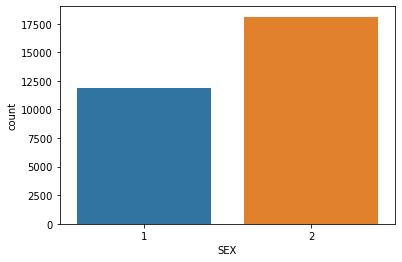

In [179]:
sns.countplot(data=df, x='SEX')
plt.show()

## Education

This is a categorical variable. 1=graduate school, 2=university, 3=high school, 4=others.

In [180]:
sorted(df['EDUCATION'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [181]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [182]:
# Place unlisted entries into category 4 (others).
df['EDUCATION'] = df['EDUCATION'].replace([0, 5, 6], 4)

In [183]:
sorted(df['EDUCATION'].unique())

[1, 2, 3, 4]

In [184]:
df=df.astype({'EDUCATION': 'category'})

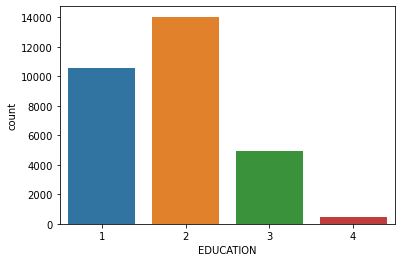

In [185]:
sns.countplot(data=df, x='EDUCATION')
plt.show()

## Marital Status

Marital status is a categorical variable.
    1 = married
    2 = single
    3 = others
However, there are 54 records with invalid entries.

In [186]:
sorted(df['MARRIAGE'].unique())

[0, 1, 2, 3]

In [187]:
len(df.loc[df['MARRIAGE']==0])

54

In [188]:
# Place the 54 unusual entries in category 3 (others).
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)

In [189]:
#df = df[df.MARRIAGE!=0]
#df = df.reset_index(drop=True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [190]:
df=df.astype({'MARRIAGE': 'category'})

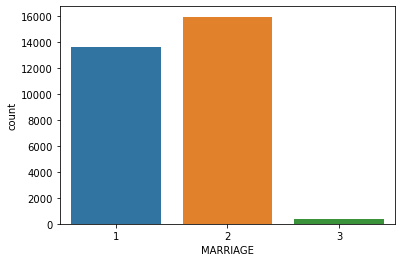

In [191]:
sns.countplot(data=df, x='MARRIAGE')
plt.show()

## Age

The data consists of individuals ages 21-79, average of 35.

In [192]:
df.AGE.describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

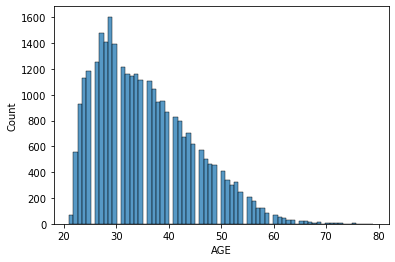

In [193]:
sns.histplot(data=df, x='AGE')
plt.show()

## Payment History

Past monthly payment records from April to September, 2005. 

* PAY_1 = the repayment status in September, 2005
* PAY_2 = the repayment status in August, 2005
* PAY_3 = the repayment status in July, 2005
* PAY_4 = the repayment status in June, 2005
* PAY_5 = the repayment status in May, 2005
* PAY_6 = the repayment status in April, 2005

The measurement scale for the repayment status is: 

* -1 = pay duly
* 1 = payment delay for one month
* 2 = payment delay for two months
* ...
* 8 = payment delay for eight months
* 9 = payment delay for nine months and above

In [194]:
# It appears that the values have been shifted from the key.
for i in range(1,7):
    print(sorted(df['PAY_'+str(i)].unique()))

[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]
[-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]


In [28]:
# df=df.astype({'PAY_1': 'category', 
#               'PAY_2': 'category',
#               'PAY_3': 'category', 
#               'PAY_4': 'category',
#               'PAY_5': 'category',
#               'PAY_6': 'category'})

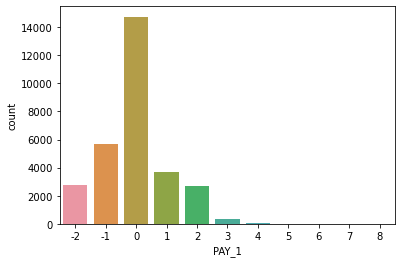

In [195]:
sns.countplot(data=df, x='PAY_1')
plt.show()

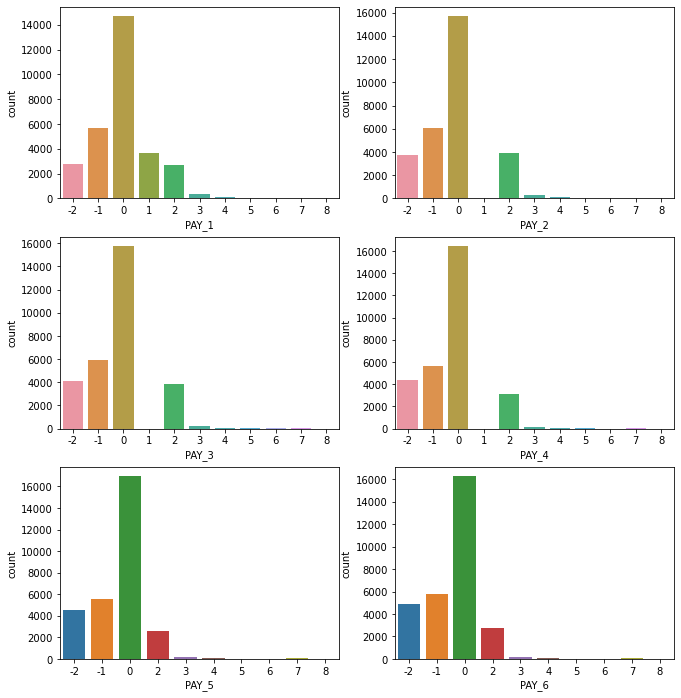

In [196]:
fig, axes = plt.subplots(3, 2, figsize=(11, 12))
sns.countplot(ax=axes[0,0], data=df, x='PAY_1')
sns.countplot(ax=axes[0,1], data=df, x='PAY_2')
sns.countplot(ax=axes[1,0], data=df, x='PAY_3')
sns.countplot(ax=axes[1,1], data=df, x='PAY_4')
sns.countplot(ax=axes[2,0], data=df, x='PAY_5')
sns.countplot(ax=axes[2,1], data=df, x='PAY_6')
plt.show()

## Billing and Payment Amounts

The billing and payment amounts are not as important as the payment history, so we make a simplification here and introduce the totals. This reduces the complexity and dimensionality.

In [197]:
df['DUES']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['PAYMENTS']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

In [199]:
df=df.drop(columns=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                   'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

## Default Payment

In [201]:
temp = df.pop('default payment next month')
df.insert(13, 'DEFAULT', temp)

In [204]:
df=df.astype({'DEFAULT': 'category'})

In [205]:
df.dtypes

LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
DUES            int64
PAYMENTS        int64
DEFAULT      category
dtype: object

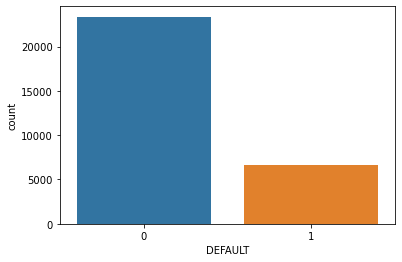

In [206]:
sns.countplot(data=df, x='DEFAULT')
plt.show()

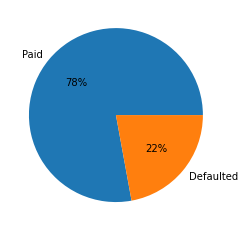

In [207]:
plt.pie(df.DEFAULT.value_counts(normalize=True)*100, 
        labels=['Paid', 'Defaulted'], autopct='%.0f%%')
plt.show()

In [208]:
df['DEFAULT'].describe()

count     30000
unique        2
top           0
freq      23364
Name: DEFAULT, dtype: int64

In [35]:
#A nice profile report of the data is generated by the command below, 
#but the output is a bulky html file.
#profile = ProfileReport(df)
#profile

In [209]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DUES,PAYMENTS,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,7704,689,1
1,120000,2,2,2,26,-1,2,0,0,0,2,17077,5000,1
2,90000,2,2,2,34,0,0,0,0,0,0,101653,11018,0
3,50000,2,2,1,37,0,0,0,0,0,0,231334,8388,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,109339,59049,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,725349,42550,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,21182,14490,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,70496,31300,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,266611,147181,1


In [210]:
df.describe(include=['category']).T

,count,unique,top,freq
SEX,30000,2,2,18112
EDUCATION,30000,4,2,14030
MARRIAGE,30000,3,2,15964
DEFAULT,30000,2,0,23364


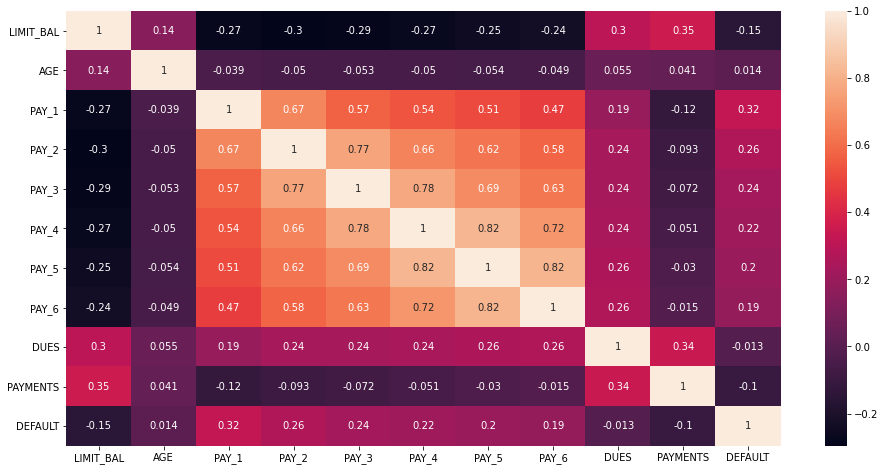

In [211]:
corr = df.astype({'DEFAULT': 'int64'}).corr()
plt.figure(figsize = (16,8))
sns.heatmap(corr, annot=True)
plt.show()

# Train Test Split

In [212]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=614, 
                                                    stratify=y)

# XGBoost Classifiers

In [348]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,\
                            precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve,\
                            f1_score, make_scorer, auc

## Baseline Model and Feature Importance

In this section we see how an XGBoost model performs with default parameters. This provides a helpful baseline for any hyperparameter tuning to come.

In [347]:
model_baseline = xgb.XGBClassifier(objective='binary:logistic', #typical choice for binary classification
                         booster='gbtree', #gradient boosted tree
                         enable_categorical=True, #native support for categorical variables
                         tree_method='hist', #categorical features supported for this type
                         learning_rate=0.1, #this is a default
                         max_depth=6, #default is 6 
                         n_estimators=100, #default is 100
                         n_jobs=-1) #uses all cores of the cpu

model_baseline.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

We inspect the performance on the training set below.

In [360]:
print(classification_report(y_true=y_train,y_pred=model_baseline.predict(X_train)))
tn, fp, fn, tp = confusion_matrix(y_true=y_train,y_pred=model_baseline.predict(X_train)).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_train,y_score=model_baseline.predict(X_train))))
print('accuracy: {}'.format(accuracy_score(y_true=y_train,y_pred=model_baseline.predict(X_train))))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91     18691
           1       0.77      0.42      0.55      5309

    accuracy                           0.84     24000
   macro avg       0.81      0.69      0.73     24000
weighted avg       0.84      0.84      0.83     24000


 TN: 18022 FP: 669 FN: 3060 TP: 2249 

auc: 0.6939138200012841
accuracy: 0.844625


Applying this model to the test set is instructive as well.

In [361]:
y_pred = model_baseline.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


 TN: 4424 FP: 249 FN: 848 TP: 479 

auc: 0.6538398770147931
accuracy: 0.8171666666666667


Finally, we take note of feature importance scores using this model.

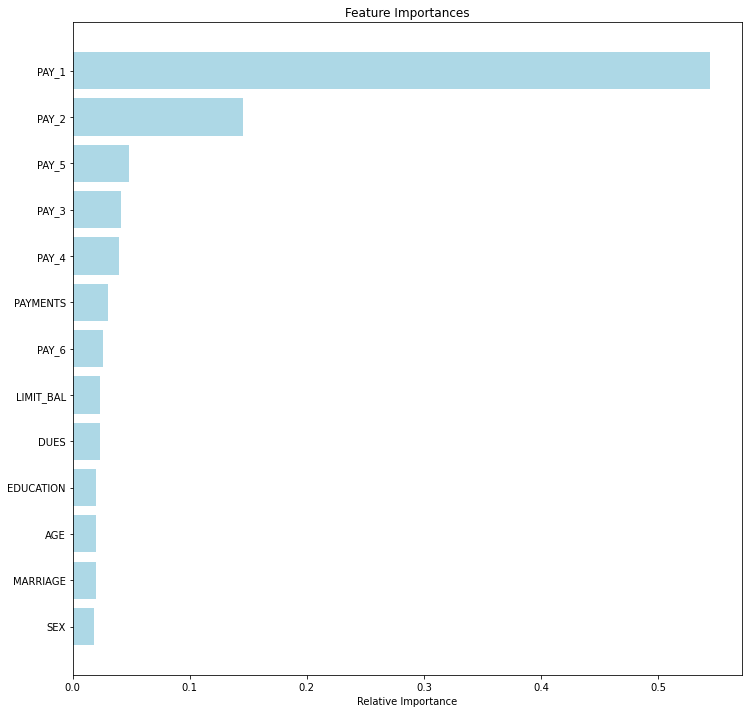

In [362]:
importances = model_baseline.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize = (12, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color = 'lightblue', align = 'center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(False)
plt.show()

## F1 Model

This model seeks to balance recall and precision.

In [363]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [365]:
model_f1 = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist')
rates = [0.1, 0.2]
weights = np.linspace(1.1, 4.0, num=30) #addresses class imbalance
trees = [80, 90, 100, 110, 120]
leaves = [3, 4, 5, 6]
depths = [3, 4, 5, 6]
param_grid = dict(learning_rate=rates, 
                  n_estimators=trees,
                  min_child_weight=leaves,
                  max_depth=depths,
                  scale_pos_weight=weights)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=614)
grid_search = GridSearchCV(model_f1, param_grid, scoring="f1", n_jobs=-1, cv=kfold)

In [366]:
grid_result = grid_search.fit(X_train, y_train)

In [367]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.548560 using {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 80, 'scale_pos_weight': 2.7}


We'll fit the model with the best parameters and inspect its performance on the training and test data.

In [368]:
model_f1_best = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist', 
                         learning_rate=0.1, 
                         max_depth=4,
                         min_child_weight=4,
                         n_estimators=80,
                         scale_pos_weight=2.7)

In [370]:
model_f1_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [371]:
print(classification_report(y_true=y_train,y_pred=model_f1_best.predict(X_train)))
tn, fp, fn, tp = confusion_matrix(y_true=y_train,y_pred=model_f1_best.predict(X_train)).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_train,y_score=model_f1_best.predict(X_train))))
print('accuracy: {}'.format(accuracy_score(y_true=y_train,y_pred=model_f1_best.predict(X_train))))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     18691
           1       0.56      0.58      0.57      5309

    accuracy                           0.80     24000
   macro avg       0.72      0.72      0.72     24000
weighted avg       0.81      0.80      0.81     24000


 TN: 16256 FP: 2435 FN: 2247 TP: 3062 

auc: 0.7232399237980404
accuracy: 0.8049166666666666


In [372]:
y_pred = model_f1_best.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      4673
           1       0.52      0.55      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.70      0.70      6000
weighted avg       0.79      0.79      0.79      6000


 TN: 4004 FP: 669 FN: 593 TP: 734 

auc: 0.7049822522593275
accuracy: 0.7896666666666666


## Recall Model

This model seeks to improve recall, possibly at the expense of precision or accuracy.

In [375]:
model_recall = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist')
rates = [0.1, 0.2]
weights = np.linspace(1.1, 4.0, num=30) #addresses class imbalance
trees = [80, 90, 100, 110, 120]
leaves = [3, 4, 5, 6]
depths = [3, 4, 5, 6]
param_grid = dict(learning_rate=rates, 
                  n_estimators=trees,
                  min_child_weight=leaves,
                  max_depth=depths,
                  scale_pos_weight=weights)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=614)
grid_search = GridSearchCV(model_recall, param_grid, scoring="recall", n_jobs=-1, cv=kfold)

In [376]:
grid_result = grid_search.fit(X_train, y_train)

In [377]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.654173 using {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 90, 'scale_pos_weight': 4.0}


In [378]:
model_recall_best = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist', 
                         learning_rate=0.2, 
                         max_depth=3,
                         min_child_weight=4,
                         n_estimators=90,
                         scale_pos_weight=4.0)

In [379]:
model_recall_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              n_estimators=90, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [380]:
print(classification_report(y_true=y_train,y_pred=model_recall_best.predict(X_train)))
tn, fp, fn, tp = confusion_matrix(y_true=y_train,y_pred=model_recall_best.predict(X_train)).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_train,y_score=model_recall_best.predict(X_train))))
print('accuracy: {}'.format(accuracy_score(y_true=y_train,y_pred=model_recall_best.predict(X_train))))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83     18691
           1       0.47      0.67      0.55      5309

    accuracy                           0.76     24000
   macro avg       0.68      0.73      0.69     24000
weighted avg       0.80      0.76      0.77     24000


 TN: 14614 FP: 4077 FN: 1726 TP: 3583 

auc: 0.728382661185114
accuracy: 0.7582083333333334


In [381]:
y_pred = model_recall_best.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83      4673
           1       0.45      0.66      0.54      1327

    accuracy                           0.75      6000
   macro avg       0.67      0.72      0.68      6000
weighted avg       0.79      0.75      0.76      6000


 TN: 3599 FP: 1074 FN: 447 TP: 880 

auc: 0.7166595093008934
accuracy: 0.7465


## Precision Model

In [382]:
model_precision = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist')
rates = [0.1, 0.2]
weights = np.linspace(1.1, 4.0, num=30) #addresses class imbalance
trees = [80, 90, 100, 110, 120]
leaves = [3, 4, 5, 6]
depths = [3, 4, 5, 6]
param_grid = dict(learning_rate=rates, 
                  n_estimators=trees,
                  min_child_weight=leaves,
                  max_depth=depths,
                  scale_pos_weight=weights)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=614)
grid_search = GridSearchCV(model_precision, param_grid, scoring="precision", n_jobs=-1, cv=kfold)

In [383]:
grid_result = grid_search.fit(X_train, y_train)

In [384]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.671778 using {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 80, 'scale_pos_weight': 1.1}


In [385]:
model_precision_best = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist', 
                         learning_rate=0.1, 
                         max_depth=3,
                         min_child_weight=6,
                         n_estimators=80,
                         scale_pos_weight=1.1)

In [386]:
model_precision_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [387]:
print(classification_report(y_true=y_train,y_pred=model_precision_best.predict(X_train)))
tn, fp, fn, tp = confusion_matrix(y_true=y_train,y_pred=model_precision_best.predict(X_train)).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_train,y_score=model_precision_best.predict(X_train))))
print('accuracy: {}'.format(accuracy_score(y_true=y_train,y_pred=model_precision_best.predict(X_train))))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89     18691
           1       0.69      0.39      0.50      5309

    accuracy                           0.83     24000
   macro avg       0.77      0.67      0.69     24000
weighted avg       0.81      0.83      0.81     24000


 TN: 17748 FP: 943 FN: 3251 TP: 2058 

auc: 0.6685957673969235
accuracy: 0.82525


In [388]:
y_pred = model_precision_best.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000


 TN: 4436 FP: 237 FN: 829 TP: 498 

auc: 0.6622828540424711
accuracy: 0.8223333333333334


## Accuracy Model

In [389]:
model_accuracy = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist')
rates = [0.1, 0.2]
weights = np.linspace(1.1, 4.0, num=30) #addresses class imbalance
trees = [80, 90, 100, 110, 120]
leaves = [3, 4, 5, 6]
depths = [3, 4, 5, 6]
param_grid = dict(learning_rate=rates, 
                  n_estimators=trees,
                  min_child_weight=leaves,
                  max_depth=depths,
                  scale_pos_weight=weights)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=614)
grid_search = GridSearchCV(model_accuracy, param_grid, scoring="precision", n_jobs=-1, cv=kfold)

In [390]:
grid_result = grid_search.fit(X_train, y_train)

In [391]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.671778 using {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 80, 'scale_pos_weight': 1.1}


In [392]:
model_accuracy_best = xgb.XGBClassifier(objective='binary:logistic',
                         booster='gbtree',
                         enable_categorical=True,
                         tree_method='hist', 
                         learning_rate=0.1, 
                         max_depth=3,
                         min_child_weight=6,
                         n_estimators=80,
                         scale_pos_weight=1.1)

In [393]:
model_accuracy_best.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [394]:
print(classification_report(y_true=y_train,y_pred=model_accuracy_best.predict(X_train)))
tn, fp, fn, tp = confusion_matrix(y_true=y_train,y_pred=model_accuracy_best.predict(X_train)).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_train,y_score=model_accuracy_best.predict(X_train))))
print('accuracy: {}'.format(accuracy_score(y_true=y_train,y_pred=model_accuracy_best.predict(X_train))))

              precision    recall  f1-score   support

           0       0.85      0.95      0.89     18691
           1       0.69      0.39      0.50      5309

    accuracy                           0.83     24000
   macro avg       0.77      0.67      0.69     24000
weighted avg       0.81      0.83      0.81     24000


 TN: 17748 FP: 943 FN: 3251 TP: 2058 

auc: 0.6685957673969235
accuracy: 0.82525


In [395]:
y_pred = model_accuracy_best.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
tn, fp, fn, tp = confusion_matrix(y_true=y_test,y_pred=y_pred).ravel()
print("\n TN: {} FP: {} FN: {} TP: {} \n".format(tn, fp, fn, tp))
print('auc: {}'.format(roc_auc_score(y_true=y_test,y_score=y_pred)))
print('accuracy: {}'.format(accuracy_score(y_true=y_test,y_pred=y_pred)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.68      0.38      0.48      1327

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000


 TN: 4436 FP: 237 FN: 829 TP: 498 

auc: 0.6622828540424711
accuracy: 0.8223333333333334
